# Analysis of experiment #2 

TIMEOUT = 900 (seconds)</br>
NRUNS = 5</br>
ALL-Z = True (all vertices can propagate)</br>

## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
import functools
from math import ceil, isnan
import numpy as np

## Read stats

In [2]:
# Read .csv (the output of stats1.py)
filename = "stats2.csv"
timeout = 900000000 # 900000000 microseconds = 900 seconds = 15 minutes
df = pd.read_csv(filename, index_col=0)

# Handle instances where no solution was found
df.loc[df.upper_bound == -1.0, "upper_bound"] = float("nan")
df.loc[df.gap == 100.0, "gap"] = float("nan")
# Handle instance with timeout
df.loc[df.result == "Timeout", "t_solver"] = timeout

# Clean instance names
df.instance = df.instance.apply(lambda x: x.split("/")[-1])
df.instance = df.instance.apply(lambda x: x.split(".")[0])

# Join instance name and omega
df["instance_omega"] = list(zip(df.instance, df.omega))

# Transform microseconds to seconds
timeout = int(900000000 / 1000000)
df.t_solver = df.t_solver / 1000000
df.t_callback = df.t_callback / 1000000

# Sort values
df = df.sort_values(["vertices", "solver", "omega", "run"], ignore_index=True)
df

,solver,instance,vertices,edges,propagating_vertices,omega,variables,constraints,run,lower_bound,upper_bound,gap,result,nodes,t_solver,callbacks,t_callback,lazy_constraints,instance_omega
0,brimkov,case4gs,4,4,4,1,24,24,0,2.0,2.0,0.0,Optimal,1,0.003829,0,0.0,0,"(case4gs, 1)"
1,brimkov,case4gs,4,4,4,1,24,24,1,2.0,2.0,0.0,Optimal,1,0.002147,0,0.0,0,"(case4gs, 1)"
2,brimkov,case4gs,4,4,4,1,24,24,2,2.0,2.0,0.0,Optimal,1,0.001735,0,0.0,0,"(case4gs, 1)"
3,brimkov,case4gs,4,4,4,1,24,24,3,2.0,2.0,0.0,Optimal,1,0.001599,0,0.0,0,"(case4gs, 1)"
4,brimkov,case4gs,4,4,4,1,24,24,4,2.0,2.0,0.0,Optimal,1,0.001564,0,0.0,0,"(case4gs, 1)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,brimkov,case300,300,409,300,12,2236,3542,0,30.0,30.0,0.0,Optimal,4075,4.900926,0,0.0,0,"(case300, 12)"
3016,brimkov,case300,300,409,300,12,2236,3542,1,30.0,30.0,0.0,Optimal,4075,4.885837,0,0.0,0,"(case300, 12)"
3017,brimkov,case300,300,409,300,12,2236,3542,2,30.0,30.0,0.0,Optimal,4075,4.883293,0,0.0,0,"(case300, 12)"
3018,brimkov,case300,300,409,300,12,2236,3542,3,30.0,30.0,0.0,Optimal,4075,4.891217,0,0.0,0,"(case300, 12)"


## Check solutions

In [3]:
def opt_val(serie):
    if serie.result == "Optimal":
        return serie.upper_bound
    else:
        return float("nan")

df["opt_val"] = df[["result", "upper_bound"]].apply(opt_val, axis=1)
df

,solver,instance,vertices,edges,propagating_vertices,omega,variables,constraints,run,lower_bound,upper_bound,gap,result,nodes,t_solver,callbacks,t_callback,lazy_constraints,instance_omega,opt_val
0,brimkov,case4gs,4,4,4,1,24,24,0,2.0,2.0,0.0,Optimal,1,0.003829,0,0.0,0,"(case4gs, 1)",2.0
1,brimkov,case4gs,4,4,4,1,24,24,1,2.0,2.0,0.0,Optimal,1,0.002147,0,0.0,0,"(case4gs, 1)",2.0
2,brimkov,case4gs,4,4,4,1,24,24,2,2.0,2.0,0.0,Optimal,1,0.001735,0,0.0,0,"(case4gs, 1)",2.0
3,brimkov,case4gs,4,4,4,1,24,24,3,2.0,2.0,0.0,Optimal,1,0.001599,0,0.0,0,"(case4gs, 1)",2.0
4,brimkov,case4gs,4,4,4,1,24,24,4,2.0,2.0,0.0,Optimal,1,0.001564,0,0.0,0,"(case4gs, 1)",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,brimkov,case300,300,409,300,12,2236,3542,0,30.0,30.0,0.0,Optimal,4075,4.900926,0,0.0,0,"(case300, 12)",30.0
3016,brimkov,case300,300,409,300,12,2236,3542,1,30.0,30.0,0.0,Optimal,4075,4.885837,0,0.0,0,"(case300, 12)",30.0
3017,brimkov,case300,300,409,300,12,2236,3542,2,30.0,30.0,0.0,Optimal,4075,4.883293,0,0.0,0,"(case300, 12)",30.0
3018,brimkov,case300,300,409,300,12,2236,3542,3,30.0,30.0,0.0,Optimal,4075,4.891217,0,0.0,0,"(case300, 12)",30.0


In [4]:
for instance in df.instance.unique():
    df1 = df[df.instance == instance]
    for omega in df1.omega.unique():
        df2 = df1[df1.omega == omega]
        lb = df2.lower_bound.max()
        ub = df2.upper_bound.min()
        if (isnan(df2.opt_val.min())):
            # Check lower and upper bounds
            assert(lb <= ub)            
        else:
            #print(instance, omega, df2.opt_val.min(), df2.opt_val.max())
            assert(df2.opt_val.min() == df2.opt_val.max())
            val = df2.opt_val.max()
            # Check lower and upper bounds
            assert(lb <= val)
            assert(val <= ub)
print("Checked :)")

Checked :)


## Average results

In [5]:
def count_opt(serie):
    return serie[serie == "Optimal"].count()

def gap_all(serie):
    return serie.mean()

def gap_feas(serie):
    return serie[serie > 0].mean()

def time_all(serie):
    return serie.mean()

def time_opt(serie):
    return serie[serie < timeout].mean()

df2 = df.groupby(["instance","vertices","edges","propagating_vertices","solver",
                  "omega","variables","constraints","instance_omega"], as_index=False).agg(
    result = ("result", count_opt),
    gap_all = ("gap", gap_all),
    gap_feas = ("gap", gap_feas),
    time_all = ("t_solver", time_all),
    time_opt = ("t_solver", time_opt),
    upper_bound = ("upper_bound", "mean")
)
df2 = df2.sort_values(["vertices", "instance", "solver", "omega"])
df2

,instance,vertices,edges,propagating_vertices,solver,omega,variables,constraints,instance_omega,result,gap_all,gap_feas,time_all,time_opt,upper_bound
276,case4gs,4,4,4,brimkov,1,24,24,"(case4gs, 1)",5,0.0,NaN,0.002175,0.002175,2.0
277,case4gs,4,4,4,brimkov,2,24,24,"(case4gs, 2)",5,0.0,NaN,0.002059,0.002059,1.0
278,case4gs,4,4,4,brimkov,3,24,24,"(case4gs, 3)",5,0.0,NaN,0.001981,0.001981,1.0
279,case4gs,4,4,4,cycles,1,20,8,"(case4gs, 1)",5,0.0,NaN,0.000877,0.000877,2.0
280,case4gs,4,4,4,cycles,2,20,8,"(case4gs, 2)",5,0.0,NaN,0.000974,0.000974,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,case300,300,409,300,brimkov,8,2236,3542,"(case300, 8)",5,0.0,NaN,7.639901,7.639901,30.0
232,case300,300,409,300,brimkov,9,2236,3542,"(case300, 9)",5,0.0,NaN,5.159918,5.159918,30.0
233,case300,300,409,300,brimkov,10,2236,3542,"(case300, 10)",5,0.0,NaN,4.655267,4.655267,30.0
234,case300,300,409,300,brimkov,11,2236,3542,"(case300, 11)",5,0.0,NaN,4.486549,4.486549,30.0


## Filter (easy) instances

Let's see for which instance all the solvers run in less than 1 second for every value of omega.

In [6]:
easy_time = 1
df3 = df2.groupby(["instance", "vertices"], as_index=False).agg(max_time_all = ("time_all", "max"))
df3 = df3[df3.max_time_all < easy_time].sort_values("vertices")
df3.instance
#df = df[~df.instance_omega.isin(easy_instances)]
#df2 = df2[~df2.instance_omega.isin(easy_instances)]

9              case4gs
10               case5
12             case6ww
14               case9
1       case11_iwamoto
2               case14
4      case24_ieee_rts
16    case_GBreduced29
5               case30
18         case_ieee30
7             case33bw
8               case39
Name: instance, dtype: object

In [7]:
# This code filter instances with less than 100 vertices
df = df[df.vertices >= 50]
df2 = df2[df2.vertices >= 50]

## Number of solved instances

In [8]:
brimkov_df = df2[df2.solver == "brimkov"]
cycles_df = df2[df2.solver == "cycles"]
forts_df = df2[df2.solver == "forts"]
jovanovic_df = df2[df2.solver == "jovanovic"]

In [9]:
labels = range(0,6,1)
palette = sns.color_palette("Spectral", n_colors=len(labels))

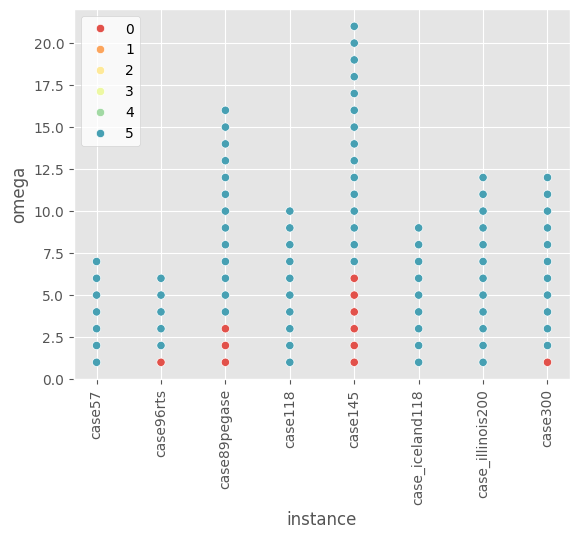

In [11]:
sns.scatterplot(x=brimkov_df.instance, y=brimkov_df.omega, 
                hue=brimkov_df.result, hue_order=labels, palette=palette)
plt.xticks(rotation=90)
plt.style.use('ggplot') 
plt.legend(facecolor="white", loc=2)
plt.show()

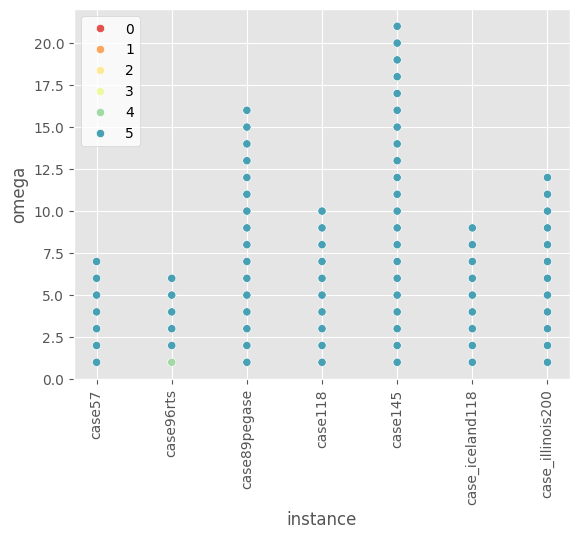

In [12]:
sns.scatterplot(x=cycles_df.instance, y=cycles_df.omega, 
                hue=cycles_df.result, hue_order=labels, palette=palette)
plt.xticks(rotation=90)
plt.style.use('ggplot') 
plt.legend(facecolor="white", loc=2)
plt.show()

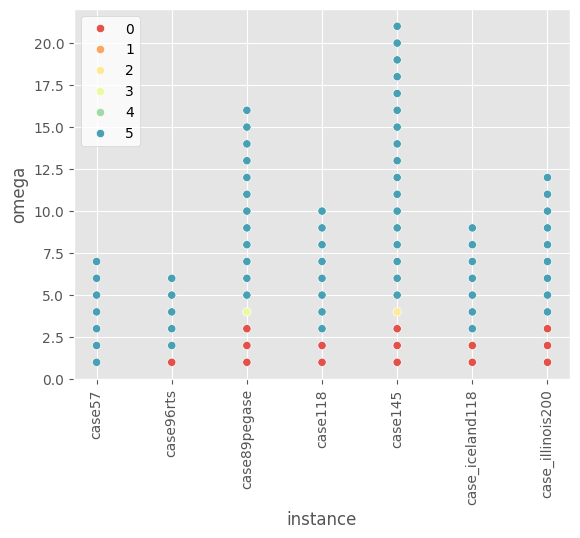

In [13]:
sns.scatterplot(x=forts_df.instance, y=forts_df.omega, 
                hue=forts_df.result, hue_order=labels, palette=palette)
plt.xticks(rotation=90)
plt.style.use('ggplot') 
plt.legend(facecolor="white", loc=2)
plt.show()

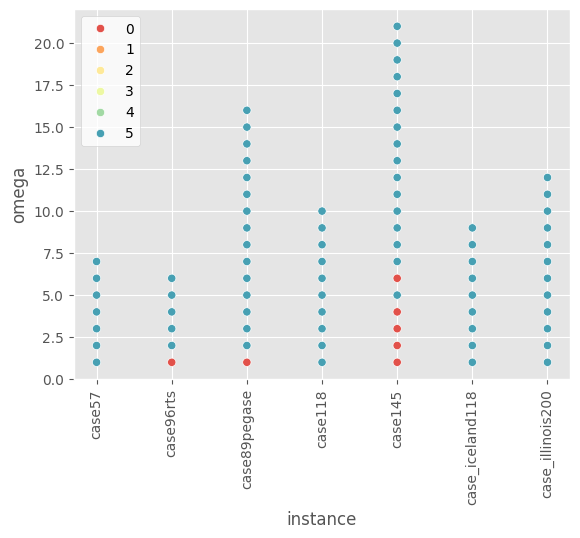

In [14]:
sns.scatterplot(x=jovanovic_df.instance, y=jovanovic_df.omega, 
                hue=jovanovic_df.result, hue_order=labels, palette=palette)
plt.xticks(rotation=90)
plt.style.use('ggplot') 
plt.legend(facecolor="white", loc=2)
plt.show()

## Best solver

In [15]:
df3 = brimkov_df.merge(cycles_df, on=["instance","vertices","edges","propagating_vertices","omega"],
                       suffixes=["", "_cycles"])
df3 = df3.merge(forts_df, on=["instance","vertices","edges","propagating_vertices","omega"],
                suffixes=["", "_forts"])
df3 = df3.merge(jovanovic_df, on=["instance","vertices","edges","propagating_vertices","omega"],
                suffixes=["_brimkov", "_jovanovic"])
df3

,instance,vertices,edges,propagating_vertices,solver_brimkov,omega,variables_brimkov,constraints_brimkov,instance_omega_brimkov,result_brimkov,...,solver_jovanovic,variables_jovanovic,constraints_jovanovic,instance_omega_jovanovic,result_jovanovic,gap_all_jovanovic,gap_feas_jovanovic,time_all_jovanovic,time_opt_jovanovic,upper_bound_jovanovic
0,case57,57,78,57,brimkov,1,426,610,"(case57, 1)",5,...,jovanovic,426,1093,"(case57, 1)",5,0.0,NaN,2.770113,2.770113,9.0
1,case57,57,78,57,brimkov,2,426,610,"(case57, 2)",5,...,jovanovic,426,1093,"(case57, 2)",5,0.0,NaN,0.190150,0.190150,5.0
2,case57,57,78,57,brimkov,3,426,610,"(case57, 3)",5,...,jovanovic,426,1093,"(case57, 3)",5,0.0,NaN,0.248352,0.248352,4.0
3,case57,57,78,57,brimkov,4,426,610,"(case57, 4)",5,...,jovanovic,426,1093,"(case57, 4)",5,0.0,NaN,0.104511,0.104511,3.0
4,case57,57,78,57,brimkov,5,426,610,"(case57, 5)",5,...,jovanovic,426,1093,"(case57, 5)",5,0.0,NaN,0.046736,0.046736,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,case_illinois200,200,245,200,brimkov,8,1380,2178,"(case_illinois200, 8)",5,...,jovanovic,1380,3758,"(case_illinois200, 8)",5,0.0,NaN,0.203856,0.203856,20.0
77,case_illinois200,200,245,200,brimkov,9,1380,2178,"(case_illinois200, 9)",5,...,jovanovic,1380,3758,"(case_illinois200, 9)",5,0.0,NaN,0.241026,0.241026,20.0
78,case_illinois200,200,245,200,brimkov,10,1380,2178,"(case_illinois200, 10)",5,...,jovanovic,1380,3758,"(case_illinois200, 10)",5,0.0,NaN,0.227854,0.227854,20.0
79,case_illinois200,200,245,200,brimkov,11,1380,2178,"(case_illinois200, 11)",5,...,jovanovic,1380,3758,"(case_illinois200, 11)",5,0.0,NaN,0.206837,0.206837,20.0


In [16]:
# First criterior: more solved instances
# Second criterion: less time 
# Third criterion: less upper bound
def compare(t1, t2):
    if t1[1] > t2[1]:
        return -1
    elif t1[1] < t2[1]:
        return 1
    if t1[2] < t2[2]:
        return -1
    elif t1[2] > t2[2]:
        return 1
    if t1[3] < t2[3]:
        return -1
    elif t1[3] > t2[3]:
        return 1
    return 0

def get_winner(serie):
    ls = [(serie["solver"+solver], 
           serie["result"+solver], 
           serie["time_opt"+solver], 
           serie["upper_bound"+solver]) 
          for solver in ("_brimkov", "_cycles", "_forts")]
    ls = sorted(ls, key=functools.cmp_to_key(compare))
    return ls[0][0]
    
df3["winner"] = df3.apply(get_winner, axis=1)
df3[["instance", "omega", "winner"]]

,instance,omega,winner
0,case57,1,cycles
1,case57,2,forts
2,case57,3,forts
3,case57,4,forts
4,case57,5,forts
...,...,...,...
76,case_illinois200,8,cycles
77,case_illinois200,9,forts
78,case_illinois200,10,forts
79,case_illinois200,11,forts


    winner  number
0  brimkov       5
1   cycles      25
2    forts      51


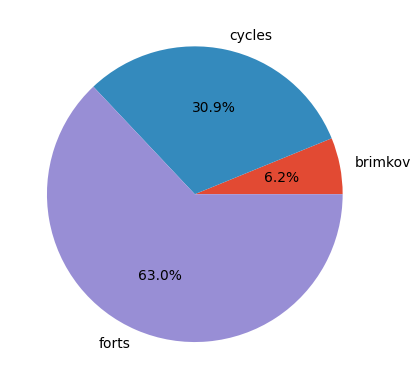

In [17]:
df4 = df3.groupby("winner", as_index=False).agg(number = ("instance","count"))
print(df4)
plt.pie(df4.number, labels=df4.winner, autopct='%1.1f%%')
plt.show()

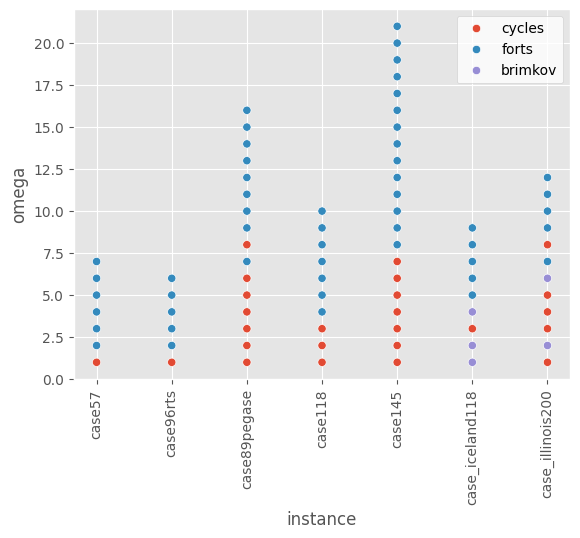

In [18]:
sns.scatterplot(x=df3.instance, y=df3.omega, hue=df3.winner)
plt.xticks(rotation=90)
plt.style.use('ggplot') 
plt.legend(facecolor="white")
plt.show()

## Max and best omega

Best omega is the minimum value of omega that minimises the objective value.

In [19]:
df4 = df.groupby("instance", as_index=False).agg(max_omega = ("omega", "max"))
max_omega = dict(zip(df4.instance, df4.max_omega))
print(max_omega)

{'case118': 10, 'case145': 21, 'case300': 12, 'case57': 7, 'case89pegase': 16, 'case96rts': 6, 'case_iceland118': 9, 'case_illinois200': 12}


In [20]:
df4 = df.sort_values(["vertices", "instance", "opt_val", "omega"], ignore_index=True).groupby("instance").head(1)
best_omega = dict(zip(df4.instance, df4.omega))
print(best_omega)

{'case57': 4, 'case96rts': 4, 'case89pegase': 8, 'case118': 5, 'case145': 7, 'case_iceland118': 7, 'case_illinois200': 8, 'case300': 8}


## Optimal times

In [21]:
modelos = df.solver.unique().tolist()

def optimal_times(df: pd.DataFrame, interval: pd.Interval, max_time : int = timeout, log_scale : bool = True):
    # Filter dataframes
    df5 = df[df[["instance","omega"]].apply(
        lambda row: (row.omega-1)/max_omega[row.instance] not in interval, axis=1) == False]
    df5 = df5[["time_opt_"+s for s in modelos]]
    # Replace NaN with Inf
    df5.replace(float("nan"), float("inf"), inplace=True)
    
    # Time instants
    times = range(0, max_time+1)
    # Empty dataframe
    df6 = pd.DataFrame(columns=["instant"]+modelos)
    # Fill dataframe
    df6["instant"] = times
    for modelo in modelos:
        df6[modelo] = times
    df6[modelos] = df6[modelos].apply(lambda row: df5[df5 <= row[modelos[0]]].count() / df5.count(), axis=1)

    # Graph
    for modelo in modelos:
        plt.plot(df6["instant"].values, df6[modelo].values)
        if (log_scale):
            plt.xscale("log")
        plt.xlabel("Time instant (seconds)")
        plt.ylabel("% Solved");
        #plt.xlim(left=step);
        plt.legend([modelo for modelo in modelos]);

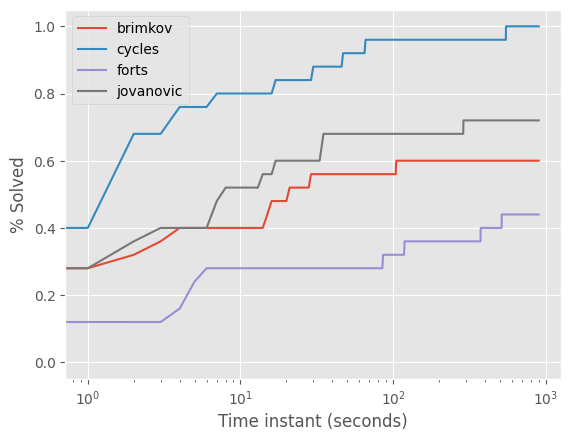

In [22]:
optimal_times(df3, pd.Interval(0, 0.25, closed="both"))

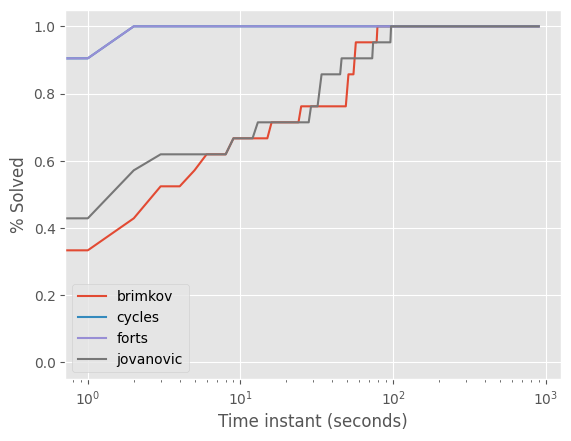

In [23]:
optimal_times(df3, pd.Interval(0.25, 0.5, closed="right"))

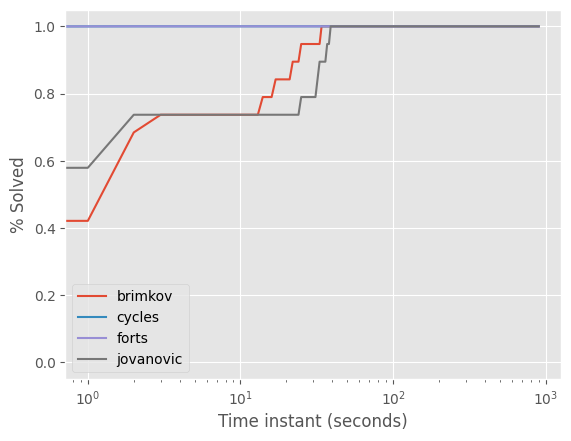

In [24]:
optimal_times(df3, pd.Interval(0.5, 0.75, closed="right"))

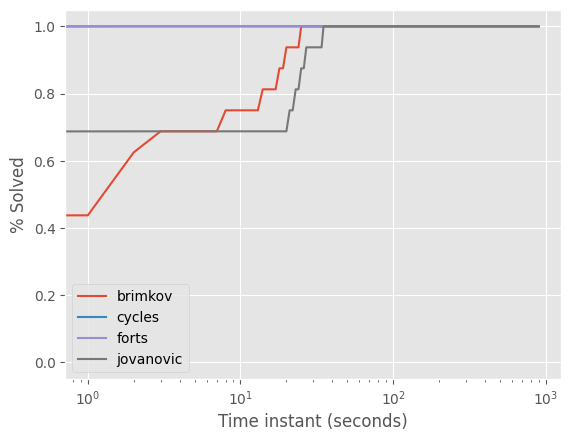

In [25]:
optimal_times(df3, pd.Interval(0.75, 1, closed="right"))

## Performance profile

In [26]:
modelos = df.solver.unique().tolist()

def performance_profile(df: pd.DataFrame, interval: pd.Interval, step: float = 0.1, log_scale : bool = True):
    # Restringir dataframes
    df5 = df[df[["instance","omega"]].apply(
        lambda row: (row.omega-1)/max_omega[row.instance] not in interval, axis=1) == False]
    df5 = df5[["time_opt_"+s for s in modelos]]
    # Dividimos cada fila por el mejor tiempo de la fila
    df5 = df5.apply(lambda row: row/row.min(), axis=1)
    # Calculamos el ratio máximo
    rM = ceil(df5.max(axis=None)) + 1
    # Reemplazamos los nan por inf
    df5.replace(float("nan"), float("inf"), inplace=True)
    
    # Vector de ratios
    ratios = np.arange(1, rM, step)
    # Dataframe vacio
    df6 = pd.DataFrame(columns=["ratio"]+modelos)
    # Llenamos el dataframe con los ratios
    df6["ratio"] = ratios
    for modelo in modelos:
        df6[modelo] = ratios
    # Llenamos las demás entradas del dataframe
    df6[modelos] = df6[modelos].apply(lambda row: find_prob(df5, row[modelos[0]]), axis=1)

    # Graficamos
    for modelo in modelos:
        plt.plot(df6["ratio"].values, df6[modelo].values)
        if (log_scale):
            plt.xscale("log")
        plt.xlabel("Ratio to best execution time, r")
        plt.ylabel("Probability of achieving a ratio < r");
        plt.legend([modelo for modelo in modelos]);
    
# Funcion que calcula los ratios
def find_prob(df, r):
    return df[df <= r].count() / df.count()    

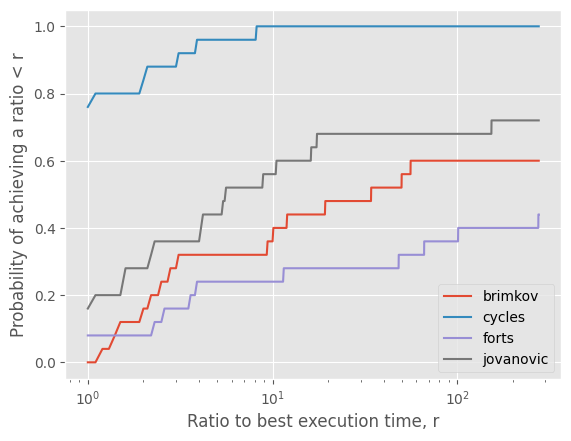

In [27]:
performance_profile(df3, pd.Interval(0, 0.25, closed="both"))

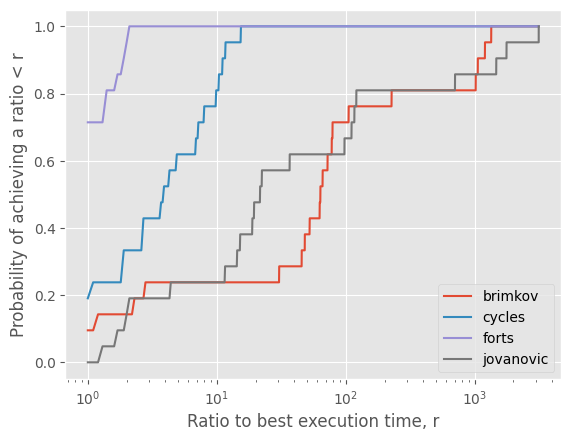

In [28]:
performance_profile(df3, pd.Interval(0.25, 0.5, closed="right"))

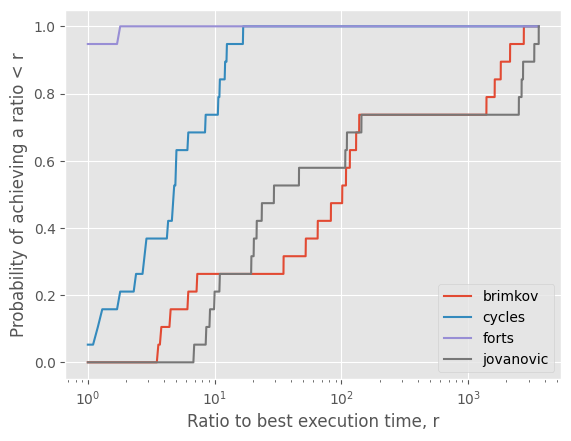

In [29]:
performance_profile(df3, pd.Interval(0.5, 0.75, closed="right"))

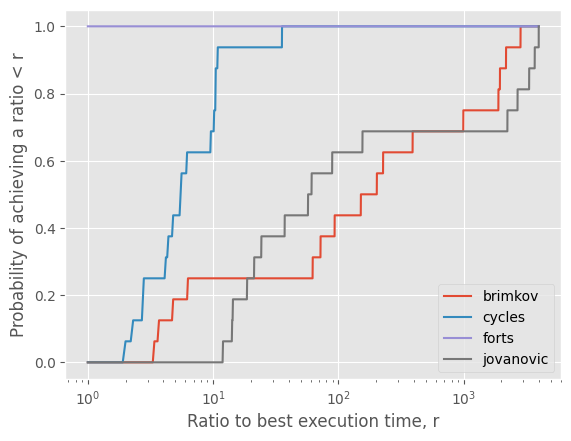

In [30]:
performance_profile(df3, pd.Interval(0.75, 1, closed="right"))